### Simulated Annealing Alg(SAA) - 模拟退火

In [ ]:
import random
from matplotlib import pyplot as plt

#### 多变量多约束优化问题
求目标函数的最小值问题
$$
f(X) = 4x_1^2 - 2.1x_1^4+x_1^6/3+x_1x_2-4x_2^2+4x_2^4
$$
在
$$
|x_i| < 5, i = 1, 2
$$
约束下的最小值问题

当前温度:100, 当次退火局部最低能量:0.028501736624262967， 对应变量：:-0.0805995704907776， 0.7079850629940845
当前温度:99.0, 当次退火局部最低能量:5.547475029882422， 对应变量：:0.09831921802101085， -0.7092974727379997
当前温度:98.01, 当次退火局部最低能量:2.027464096642062， 对应变量：:0.09831921802101085， -0.7092974727379997
当前温度:97.0299, 当次退火局部最低能量:11.419296484166871， 对应变量：:-0.08629532395276263， 0.7076467182246651
当前温度:96.059601, 当次退火局部最低能量:92.8121675210167， 对应变量：:-0.08629532395276263， 0.7076467182246651
当前温度:95.09900499, 当次退火局部最低能量:0.10708625178049558， 对应变量：:-0.08629532395276263， 0.7076467182246651
当前温度:94.1480149401, 当次退火局部最低能量:33.55129847403336， 对应变量：:-0.09286225717564145， 0.7099367508665742
当前温度:93.206534790699, 当次退火局部最低能量:9.40043206762431， 对应变量：:-0.09286225717564145， 0.7099367508665742
当前温度:92.27446944279201, 当次退火局部最低能量:33.721004238373816， 对应变量：:-0.09286225717564145， 0.7099367508665742
当前温度:91.35172474836409, 当次退火局部最低能量:7.177801287225055， 对应变量：:-0.09286225717564145， 0.7099367508665742
当前温度:90.43820750088045, 当次退火局部最低能量:214.39230509951287， 

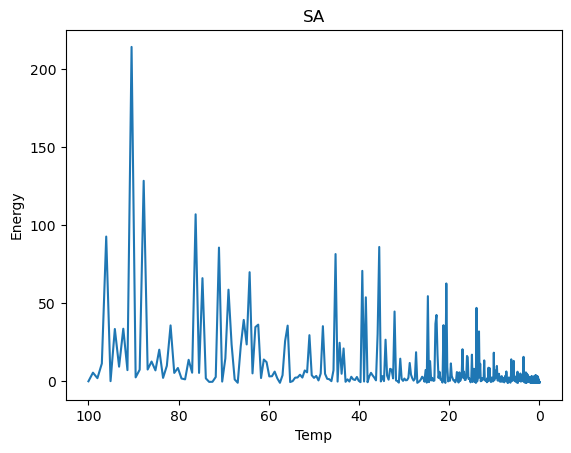

全局最优解:x1=0.08987165201843941, x2=-0.7126771178303216, 最优解目标值:-1.0316284471649841


In [23]:
class SA:
    def __init__(self, target_func, MAX_GENERATION=10, T_START=100, T_END=0.01, ANNEAL_RATE=0.99):
        self.MAX_GENERATION = MAX_GENERATION
        self.T_START = T_START
        self.T_END = T_END
        self.ANNEAL_RATE = ANNEAL_RATE
        self.target_func = target_func
        self.T_cur = T_START
        self.var1_global_best = 0
        self.var2_global_best = 0
        self.E_global_best = float("inf")
        self.history = {'Energy': [], 'Temp': []}

    
    def generate_new(self, x, y):
        while True:
            # 在现有解基础上产生随机扰动
            x_new = x + self.T_cur * (random() - random())
            y_new = y + self.T_cur * (random() - random())
            # 检查约束
            if abs(x_new) < 5 and abs(y_new) < 5:
                break
        return x_new, y_new
    
    def Metropolis(self, E, E_new):    # Metropolis接收准则
        if E_new <= E:      
            return 1
        else:
            p = math.exp((E - E_new) / self.T_cur)
            if random() < p:
                return 1
            else:
                return 0            
    
    def simulate_annealing(self):
        # init
        var1_new, var2_new = self.generate_new(2, 2)
        var1_current_best, var2_current_best = var1_new, var2_new
        self.var1_global_best, self.var2_global_best = var1_current_best, var2_current_best
        
        # 外循环，退火
        while self.T_cur > self.T_END:
            
            E_current_best = self.target_func(var1_current_best, var2_current_best)
            
            # 内循环
            for i in range(self.MAX_GENERATION):
                
                # 1. 在现有解基础上产生随机扰动 2. 检查约束
                var1_new, var2_new = self.generate_new(var1_new, var2_new)
                
                # 退火过程
                E_new = self.target_func(var1_new, var2_new)        # 目标函数
                
                # 接受准则
                if self.Metropolis(E_current_best, E_new):
                    E_current_best = E_new
                    var1_current_best, var2_current_best = var1_new, var2_new
                    
                    if E_new <= self.E_global_best:
                        self.E_global_best = E_new
                        self.var1_global_best, self.var2_global_best = var1_new, var2_new
                        
            # 当前温度下粒子退火迭代gen次后，开始降温
            print(f"当前温度:{self.T_cur}, 当次退火局部最低能量:{E_current_best}， 对应变量：:{self.var1_global_best}， {self.var2_global_best}")
            
            # 记录
            self.history['Energy'].append(E_current_best)
            self.history['Temp'].append(self.T_cur)
            # 降温
            self.T_cur = self.T_cur * self.ANNEAL_RATE    
           
        # 退火结束，此时已经获得最优解 

def func(x, y):                  #函数优化问题
    res= 4*x**2-2.1*x**4+x**6/3+x*y-4*y**2+4*y**4
    return res

# 主函数
sa = SA(func, MAX_GENERATION=100000, T_START=100, T_END=0.01, ANNEAL_RATE=0.99)
sa.simulate_annealing()

plt.plot(sa.history['Temp'], sa.history['Energy'])
plt.title('SA')
plt.xlabel('Temp')
plt.ylabel('Energy')
plt.gca().invert_xaxis()
plt.show()

print(f"全局最优解:x1={sa.var1_global_best}, x2={sa.var2_global_best}, 最优解目标值:{sa.E_global_best}")
    

F=-1.031625429196589, x=0.08938307402665262, y=-0.713147655357832


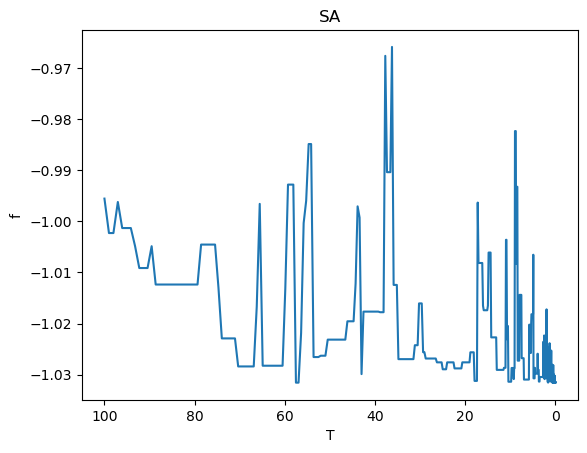

In [19]:
import math
from random import random
import matplotlib.pyplot as plt

def func(x, y):                  #函数优化问题
    res= 4*x**2-2.1*x**4+x**6/3+x*y-4*y**2+4*y**4
    return res
#x为公式里的x1,y为公式里面的x2
class SA:
    def __init__(self, func, iter=1000, T0=100, Tf=0.01, alpha=0.99):
        self.func = func
        self.iter = iter         #内循环迭代次数,即为L =100
        self.alpha = alpha       #降温系数，alpha=0.99
        self.T0 = T0             #初始温度T0为100
        self.Tf = Tf             #温度终值Tf为0.01
        self.T = T0              #当前温度
        self.x = [random() * 11 -5  for i in range(iter)] #随机生成100个x的值
        self.y = [random() * 11 -5  for i in range(iter)] #随机生成100个y的值
        self.most_best =[]
        """
        random()这个函数取0到1之间的小数
        如果你要取0-10之间的整数（包括0和10）就写成 (int)random()*11就可以了，11乘以零点多的数最大是10点多，最小是0点多
        该实例中x1和x2的绝对值不超过5（包含整数5和-5），（random() * 11 -5）的结果是-6到6之间的任意值（不包括-6和6）
        （random() * 10 -5）的结果是-5到5之间的任意值（不包括-5和5），所有先乘以11，取-6到6之间的值，产生新解过程中，用一个if条件语句把-5到5之间（包括整数5和-5）的筛选出来。
        """
        self.history = {'f': [], 'T': []}

    def generate_new(self, x, y):   #扰动产生新解的过程
        while True:
            x_new = x + self.T * (random() - random())
            y_new = y + self.T * (random() - random())
            if (-5 <= x_new <= 5) & (-5 <= y_new <= 5):  
                break                                  #重复得到新解，直到产生的新解满足约束条件
        return x_new, y_new 

    def Metropolis(self, f, f_new):   #Metropolis准则
        if f_new <= f:
            return 1
        else:
            p = math.exp((f - f_new) / self.T)
            if random() < p:
                return 1
            else:
                return 0

    def best(self):    #获取最优目标函数值
        f_list = []    #f_list数组保存每次迭代之后的值
        for i in range(self.iter):
            f = self.func(self.x[i], self.y[i])
            f_list.append(f)
        f_best = min(f_list)
        
        idx = f_list.index(f_best)
        return f_best, idx    #f_best,idx分别为在该温度下，迭代L次之后目标函数的最优解和最优解的下标

    def run(self):
        count = 0
        #外循环迭代，当前温度小于终止温度的阈值
        while self.T > self.Tf:       
           
            #内循环迭代100次
            for i in range(self.iter): 
                f = self.func(self.x[i], self.y[i])                    #f为迭代一次后的值
                x_new, y_new = self.generate_new(self.x[i], self.y[i]) #产生新解
                f_new = self.func(x_new, y_new)                        #产生新值
                if self.Metropolis(f, f_new):                         #判断是否接受新值
                    self.x[i] = x_new             #如果接受新值，则把新值的x,y存入x数组和y数组
                    self.y[i] = y_new
            # 迭代L次记录在该温度下最优解
            ft, _ = self.best()
            self.history['f'].append(ft)
            self.history['T'].append(self.T)
            #温度按照一定的比例下降（冷却）
            self.T = self.T * self.alpha        
            count += 1
            
            # 得到最优解
        f_best, idx = self.best()
        print(f"F={f_best}, x={self.x[idx]}, y={self.y[idx]}")

sa = SA(func)
sa.run()

plt.plot(sa.history['T'], sa.history['f'])
plt.title('SA')
plt.xlabel('T')
plt.ylabel('f')
plt.gca().invert_xaxis()
plt.show()

